DESCRIPCIÓN: predicción de la distancia usando serie temporales con tensorflow

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
import tensorflow as tf

In [15]:
sns.set_theme(style='darkgrid')

Importamos los Datos de csv

In [132]:
# Si nuestro archivo csv que estamos leyendo esta separado por comas
df_train = pd.read_csv("./data/Entrenamiento.csv", encoding='utf-8', index_col = False, usecols = [1,3,4,5,6,8,9,10,11])

In [133]:
df_train['Fecha'] = pd.to_datetime(df_train.Hora, format="%Y/%m/%d/ %H:%M:%S", errors='coerce')

In [134]:
# Corrige el error de lectura del archivo, pasa de string/objetc a float
df_train['Canal'] = df_train['Canal'].replace('[^\d.]','', regex=True).astype(int)

df_train = df_train.astype({'RSSI':'float','Ang_azimuth':'float','Ang_elevacion':'float',
                            'Canal':'float','Altura_ant(cm)':'float','Distancia_entre_ant_tag(cm)':'float',
                            'Altura_tag(cm)':'float','Error_dato_medido':'float'})

In [50]:
#df_train.info()

In [135]:
# Por si algún dato esta sin la fecha correcta
df_train[df_train.Fecha.isna()==True]

,Hora,RSSI,Ang_azimuth,Ang_elevacion,Canal,Altura_ant(cm),Distancia_entre_ant_tag(cm),Altura_tag(cm),Error_dato_medido,Fecha


<AxesSubplot:xlabel='Fecha', ylabel='Ang_azimuth'>

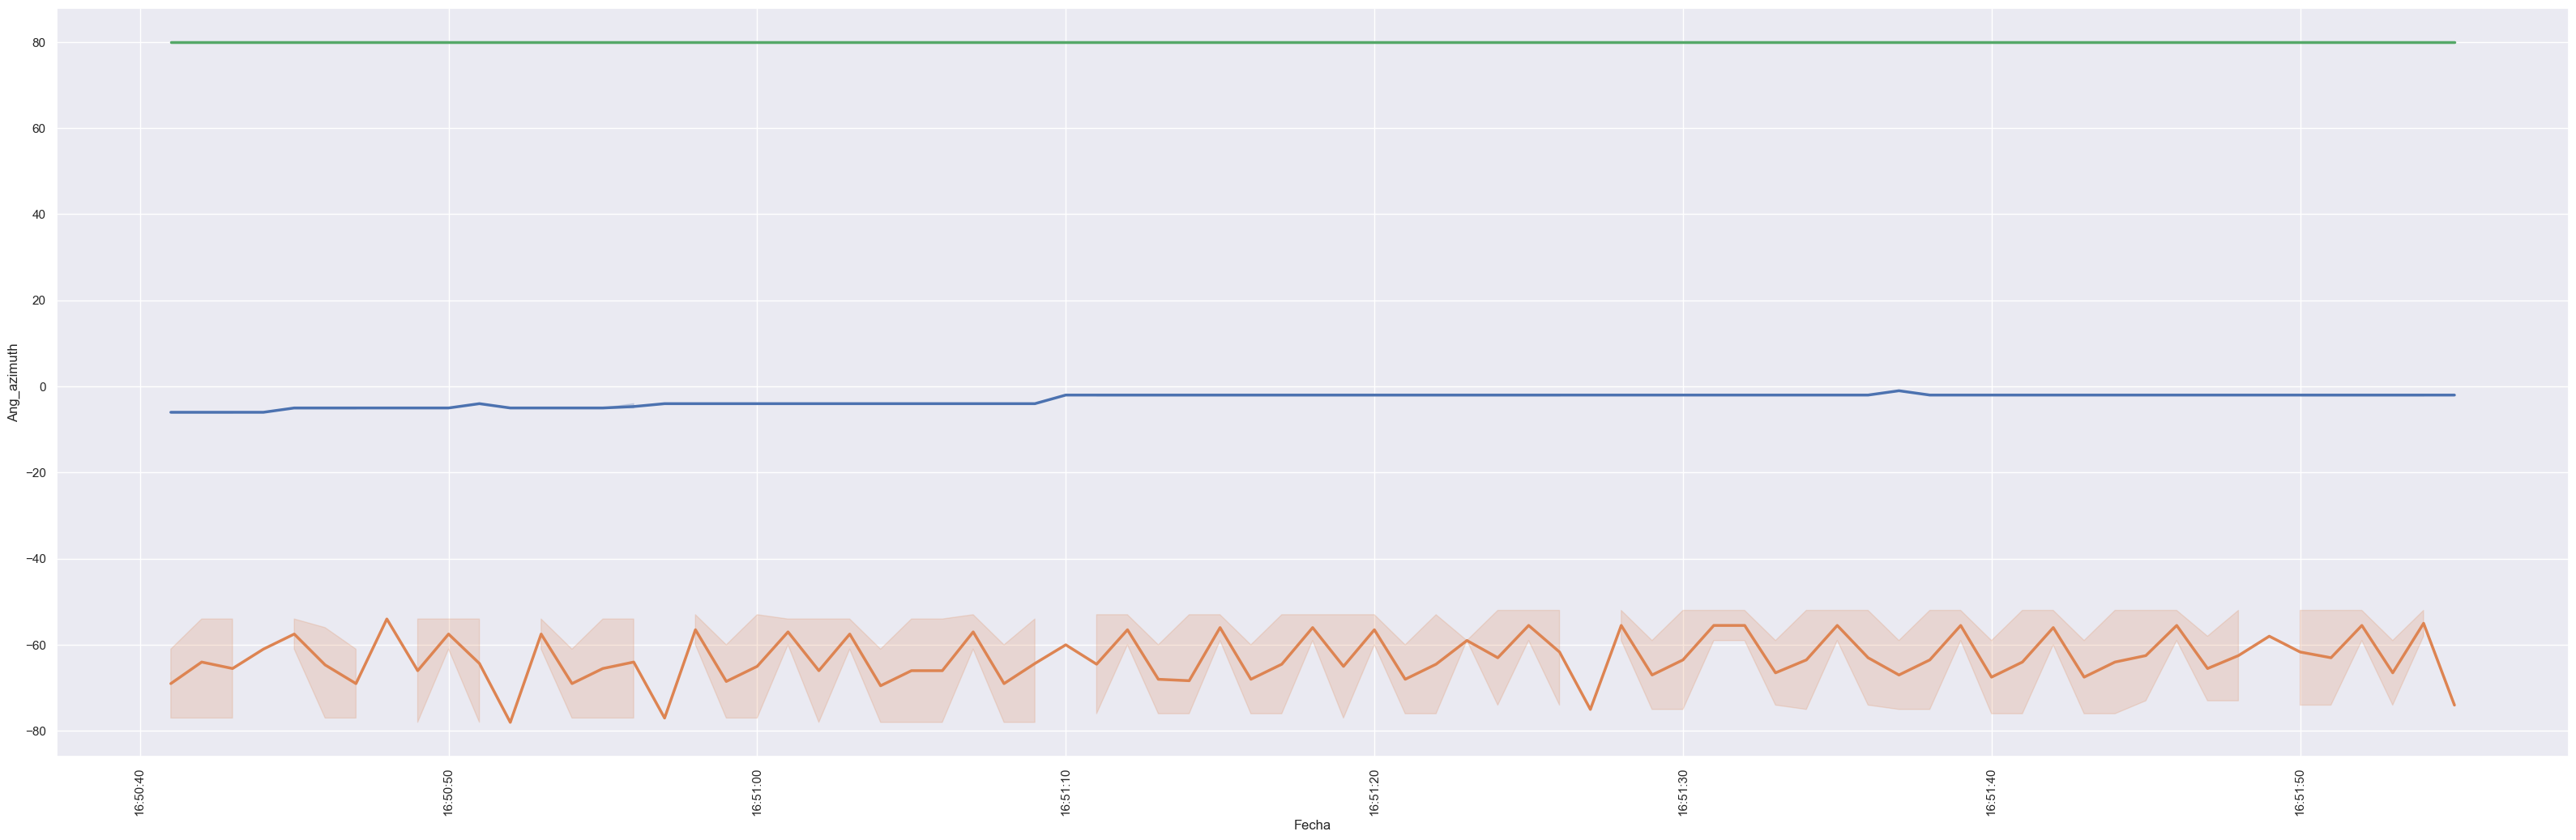

In [136]:
fig, ax = plt.subplots(figsize=(40, 12))
plt.xticks(rotation=90)

sns.lineplot(x='Fecha',y='Ang_azimuth', data=df_train.tail(150), palette='tab10', linewidth=2.5, ax=ax )
sns.lineplot(x='Fecha',y='RSSI', data=df_train.tail(150), palette='tab10', linewidth=2.5, ax=ax )
sns.lineplot(x='Fecha',y='Distancia_entre_ant_tag(cm)', data=df_train.tail(150), palette='tab10', linewidth=2.5, ax=ax )

In [137]:
df = df_train[['Fecha','RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido']]

In [138]:
print("Fecha inicio es: ",df.Fecha.min())
print("Fecha termino es: ",df.Fecha.max())

Fecha inicio es:  2022-09-17 16:09:20
Fecha termino es:  2022-09-23 16:51:55


In [139]:
date_time_s = df.pop('Fecha')
timestap_s = date_time_s.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425) * day

In [140]:
df['day_sin'] = np.sin(timestap_s * (2*np.pi /day))
df['day_cos'] = np.cos(timestap_s * (2*np.pi /day))
df['year_sin'] = np.sin(timestap_s * (2*np.pi /year))
df['year_cos'] = np.cos(timestap_s * (2*np.pi /year))


c:\Users\Poxan\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Poxan\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Poxan\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [141]:
df['Fecha'] = date_time_s

In [142]:
train,test = df.loc[df.Fecha <= '2022-09-22'], df.loc[df.Fecha > '2022-09-22']

In [143]:
date_time_train = train.pop('Fecha')
date_time_test = test.pop('Fecha')

In [144]:
train.head()

,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido,day_sin,day_cos,year_sin,year_cos
0,-60.0,-9.0,-12.0,134.0,30.0,0.0,-0.954588,0.29793,-0.97218,-0.234234
1,-60.0,-8.0,-6.0,134.0,30.0,0.0,-0.954588,0.29793,-0.97218,-0.234234
2,-56.0,-9.0,-12.0,134.0,30.0,0.0,-0.954566,0.29800,-0.97218,-0.234234
3,-63.0,-9.0,-12.0,134.0,30.0,0.0,-0.954566,0.29800,-0.97218,-0.234234
4,-59.0,-8.0,-6.0,134.0,30.0,0.0,-0.954566,0.29800,-0.97218,-0.234234


In [145]:
scaler = MinMaxScaler()
scaler = scaler.fit(train)

train[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido','day_sin','day_cos','year_sin','year_cos']]=scaler.transform(train[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido','day_sin','day_cos','year_sin','year_cos']])


c:\Users\Poxan\miniconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [146]:
train.head()

,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido,day_sin,day_cos,year_sin,year_cos
0,0.891892,0.474227,0.357143,0.0,0.0,0.0,0.022674,0.418706,1.000000,0.000000
1,0.891892,0.484536,0.410714,0.0,0.0,0.0,0.022674,0.418706,1.000000,0.000000
2,0.899614,0.474227,0.357143,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004
3,0.886100,0.474227,0.357143,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004
4,0.893822,0.484536,0.410714,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004


In [147]:
test[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido','day_sin','day_cos','year_sin','year_cos']]=scaler.transform(test[['RSSI','Ang_azimuth','Ang_elevacion','Altura_ant(cm)','Distancia_entre_ant_tag(cm)','Error_dato_medido','day_sin','day_cos','year_sin','year_cos']])
train.head()

c:\Users\Poxan\miniconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido,day_sin,day_cos,year_sin,year_cos
0,0.891892,0.474227,0.357143,0.0,0.0,0.0,0.022674,0.418706,1.000000,0.000000
1,0.891892,0.484536,0.410714,0.0,0.0,0.0,0.022674,0.418706,1.000000,0.000000
2,0.899614,0.474227,0.357143,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004
3,0.886100,0.474227,0.357143,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004
4,0.893822,0.484536,0.410714,0.0,0.0,0.0,0.022685,0.418763,0.999996,0.000004


In [148]:
test.head()

,RSSI,Ang_azimuth,Ang_elevacion,Altura_ant(cm),Distancia_entre_ant_tag(cm),Error_dato_medido,day_sin,day_cos,year_sin,year_cos
12240,0.903475,0.412371,0.330357,0.0,0.764706,0.0,0.026644,-0.094800,-0.408213,1.514359
12241,0.903475,0.402062,0.330357,0.0,0.764706,0.0,0.026632,-0.094743,-0.408215,1.514362
12242,0.895753,0.402062,0.330357,0.0,0.764706,0.0,0.026632,-0.094743,-0.408215,1.514362
12243,0.903475,0.402062,0.330357,0.0,0.764706,0.0,0.026621,-0.094686,-0.408218,1.514366
12244,0.895753,0.402062,0.330357,0.0,0.764706,0.0,0.026621,-0.094686,-0.408218,1.514366


In [149]:
def create_dataset(X, y, times_steps=1):
    Xs, ys = [], []
    for i in range(len(X)-times_steps):
        v = X.iloc[i:(i+times_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+times_steps])
    return np.array(Xs), np.array(ys)


In [150]:
time_step = 24*30

X_train, y_train = create_dataset(train,train['Distancia_entre_ant_tag(cm)'],time_step)
X_test, y_test = create_dataset(test,test['Distancia_entre_ant_tag(cm)'],time_step)

print(X_train.shape, y_train.shape)

(11520, 720, 10) (11520,)


In [151]:
print(X_train.shape[1])

720


Comenzamos definiendo el modelo de la red neuronal

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(
    units = 128,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(tf.keras.layers.Dense(units=1))

In [115]:
model.compile(
    loss="mean_squared_error",
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [116]:
model

In [117]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10)

In [118]:
history = model.fit(
    X_train,
    y_train,
    epochs= 10,
    batch_size = 64,
    validation_split=0.1,
    verbose = 1,
    shuffle = False,
    callbacks = [callback]
)

Epoch 1/10
162/162 [==============================] - 207s 1s/step - loss: 0.0103 - val_loss: 0.0124
Epoch 2/10
162/162 [==============================] - 221s 1s/step - loss: 0.0081 - val_loss: 0.0065
Epoch 3/10
162/162 [==============================] - 180s 1s/step - loss: 0.0050 - val_loss: 0.0055
Epoch 4/10
162/162 [==============================] - 167s 1s/step - loss: 0.0042 - val_loss: 0.0038
Epoch 5/10
162/162 [==============================] - 145s 896ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/10
162/162 [==============================] - 158s 973ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/10
162/162 [==============================] - 170s 1s/step - loss: 0.0026 - val_loss: 0.0037
Epoch 8/10
162/162 [==============================] - 212s 1s/step - loss: 0.0024 - val_loss: 0.0032
Epoch 9/10
162/162 [==============================] - 148s 913ms/step - loss: 0.0024 - val_loss: 0.0044
Epoch 10/10
162/162 [==============================] - 141s 872ms/step - loss: 0.0

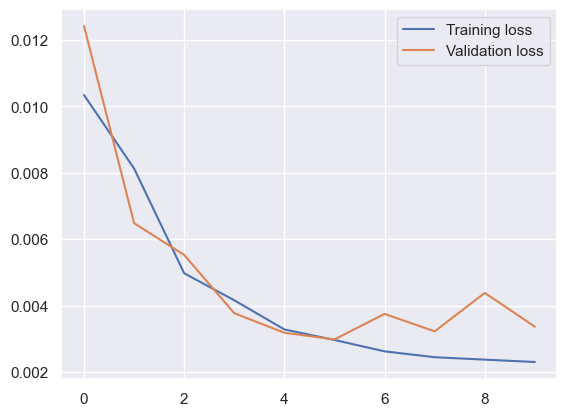

In [152]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [153]:
y_pred = model.predict(X_test)

244/244 [==============================] - 52s 211ms/step


In [154]:
y_test

array([0.70588235, 0.70588235, 0.70588235, ..., 0.29411765, 0.29411765,
       0.29411765])

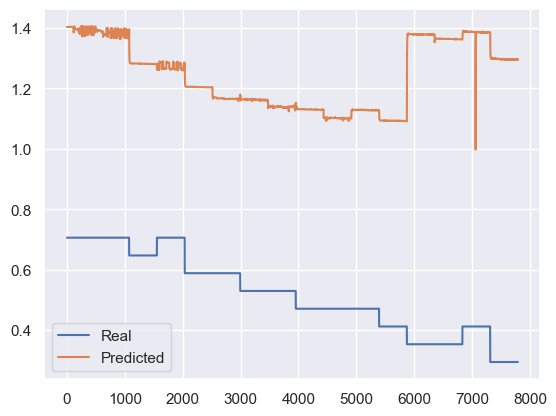

In [155]:
plt.plot(y_test,label='Real')
plt.plot(y_pred, label='Predicted')
plt.legend()